# Alpsko smučanje

## Priprava podatkov

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as py
#import scipy

# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default')
#plt.rcParams['figure.figsize'] = (15, 5)


# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

Najprej sem spletne strani [FIS](http://www.fis-ski.com/alpine-skiing/athletes/) pobrala podatke o smučarjih in njihovih id številkah na spletišču FIS. Id-je sem potrebovala za sestavljanje url naslovov posameznih športnikov. Zbrane podatke sem nato spravila v datoteko smucarji.csv.

In [2]:
pot="csv-datoteke/smucarji.csv"
smucarji = pd.read_csv(pot, parse_dates=['rojstvo'])

Tabela izgleda tako:

In [3]:
smucarji[:10]

,id,ime,drzava,rojstvo,smuci
0,70206,ABDERHALDEN Marianne,SUI,1986-01-04,Head
1,148274,AERNI Luca,SUI,1993-03-27,Salomon
2,166907,AGER Christina,AUT,1995-11-11,Atomic
3,137008,AGNELLI Nicole,ITA,1992-02-25,Elan
4,139437,ALOPINA Ksenia,RUS,1992-05-30,Rossignol
5,163567,ALPHAND Estelle,FRA,1995-04-23,Dynastar
6,125750,ANKENY Michael,USA,1991-01-17,Nordica
7,80000,BAECK Axel,SWE,1987-12-23,Rossignol
8,120086,BAILET Margot,FRA,1990-07-25,Salomon
9,104084,BALLERIN Andrea,ITA,1989-01-02,Fischer


Nato sem za vsakega od tekmovalcev s strani z njegovimi rezultati (npr. [Eva-Maria Brem](http://data.fis-ski.com/dynamic/athlete-biography.html?sector=AL&listid=&competitorid=94808&type=result&rec_start=0&limit=100)) pobrala podatke o vsaki tekmi: datum, prizorišče, disciplino, uvrstitev, zaostanek.

In [4]:
pot_brem = "csv-datoteke/BREM  Eva-Maria.csv"
brem = pd.read_csv(pot_brem, parse_dates=['datum'])

Tabela za Evo-Mario Brem:

In [29]:
brem[:10]

,datum,kraj,disciplina,mesto,zaostanek,mesto1,tocke
0,2016-03-20,St. Moritz,Giant Slalom,4,7.78,4,50
1,2016-07-03,Jasna,Giant Slalom,1,0.00,1,100
2,2016-06-03,Jasna,Slalom,26,46.21,26,5
3,2016-02-15,Crans Montana,Slalom,DNQ1,NaN,0,0
4,2016-01-30,Maribor,Giant Slalom,4,2.68,4,50
5,2016-01-17,Flachau,Giant Slalom,4,10.75,4,50
6,2016-01-15,Flachau,Slalom,26,22.85,26,5
7,2016-12-01,Flachau,Slalom,26,34.79,26,5
8,2016-05-01,Santa Caterina Valfurva,Slalom,26,36.17,26,5
9,2015-12-29,Lienz,Slalom,21,19.38,21,10


Da lahko primerjam tudi tekmovalce med seboj, sem naredila še csv datoteko 'vse.csv', v kateri zapišem vse podatke kot zgoraj in id tekmovalca:

In [6]:
pot1 ="csv-datoteke/vse.csv"
vse = pd.read_csv(pot1, parse_dates=['datum'])

Tabela izgleda tako:

In [7]:
vse[197:203]

,id,datum,kraj,disciplina,mesto,zaostanek
197,163567,2014-07-03,Are,Giant Slalom,DNQ1,NaN
198,163567,2014-06-03,Are,Giant Slalom,DNQ1,NaN
199,163567,2013-09-03,Ofterschwang,Giant Slalom,DNF1,NaN
200,125750,2016-06-03,Kranjska Gora,Slalom,DNQ1,NaN
201,125750,2016-04-03,Kranjska Gora,Giant Slalom,DNS1,NaN
202,125750,2016-02-14,Yuzawa Naeba,Slalom,DNQ1,NaN


V kasnejši analizi se pojavi težava, da so podatki o uvrstitvi lahko številke ali besedilo (npr. DNQ1, DNF1, DSQ2 in DNS1), ki označuje odstope, diskvalifikacije in podobne anomalije.
Zato tabelam dodamo nov stolpec __mesto1__, kjer besedilne podatke identificiramo z 0. Tu nas ne zanima, zakaj tekmovalec ni osvojil točk.

In [8]:
def pretvori(bes):
    if bes in ['DNQ1', 'DNF1', 'DSQ2', 'DNS1','DNF2','DSQ1','DNS2','DNQ2','DNF','DNC1','DSQ','DNS']:
        return 0
    else:
        return int(bes)

Če bomo želeli delati analizo skupnega seštevka, moramo pretvoriti mesto tudi v točke. Definiramo seznam 'tocke', v katerega na i-to mesto (i teče od 0 do 30) zapišemo, koliko točk tekmovalec dobi za osvojeno i-to mesto. Nato napišemo še funkcijo, ki nam pretvori mesto v osvojene točke.

In [9]:
tocke=[0,100,80,60,50,45,40,36,32,29,26,24,22,20,18,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]

def pretvori_2(bes):
    if bes in ["DNQ1", "DNF1", "DSQ2", "DNS1", "DNF2"]:
        return 0
    else:
        if int(bes) > 30:
            return 0
        else:
            return tocke[int(bes)];        

Tabelam zdaj dodamo stolpce:

In [10]:
vse['mesto1'] = vse['mesto'].map(pretvori)
brem['mesto1'] = brem['mesto'].map(pretvori)
vse['tocke'] = vse['mesto1'].map(pretvori_2)
brem['tocke'] = brem['mesto1'].map(pretvori_2)
brem[:5]

,datum,kraj,disciplina,mesto,zaostanek,mesto1,tocke
0,2016-03-20,St. Moritz,Giant Slalom,4,7.78,4,50
1,2016-07-03,Jasna,Giant Slalom,1,0.00,1,100
2,2016-06-03,Jasna,Slalom,26,46.21,26,5
3,2016-02-15,Crans Montana,Slalom,DNQ1,NaN,0,0
4,2016-01-30,Maribor,Giant Slalom,4,2.68,4,50


Zgornja tabela prikazuje predelano tabelo za Evo-Mario Brem. Enako smo naredili s tabelo z vsemi podatki:

In [11]:
vse[2024:2028]

,id,datum,kraj,disciplina,mesto,zaostanek,mesto1,tocke
2024,94808,2007-01-14,Altenmarkt-Zauchensee,Super Combined,29,36.78,29,2
2025,94808,2005-12-29,Lienz,Slalom,DNQ1,NaN,0,0
2026,128892,2016-05-03,Kranjska Gora,Giant Slalom,26,37.92,26,5
2027,128892,2016-04-03,Kranjska Gora,Giant Slalom,DNQ1,NaN,0,0


## Analiza

### Analiza dosežkov Eve-Marie Brem

Pa si poglejmo, v katerih disciplinah najpogosteje tekmuje Eva-Maria Brem:

In [12]:
brem['disciplina'].value_counts()

Giant Slalom      67
Slalom            49
Super Combined     8
Super G            2
Downhill           1
Name: disciplina, dtype: int64

Eva-Maria Brem je torej najpogosteje tekmuje v slalomu in veleslalomu. Ponazorimo to še z grafom:

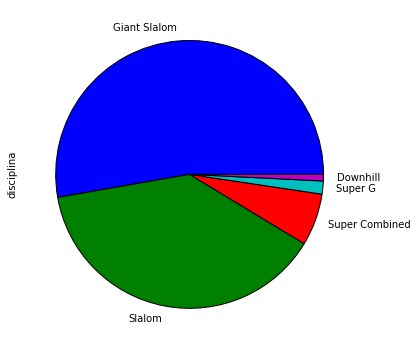

In [13]:
brem['disciplina'].value_counts().plot(kind='pie', figsize=(6,6))

Čeprav najpogosteje tekmuje v slalomu in veleslalomu, pa to nista nujno disciplini, v katerih dosega najboljše rezultate. Najprej si poglejmo, kakšni so njeni rezultati v slalomu in nato še veleslalomu:

In [14]:
slalom = brem['disciplina'] == 'Slalom'
brem[slalom][:10]

,datum,kraj,disciplina,mesto,zaostanek,mesto1,tocke
2,2016-06-03,Jasna,Slalom,26,46.21,26,5
3,2016-02-15,Crans Montana,Slalom,DNQ1,NaN,0,0
6,2016-01-15,Flachau,Slalom,26,22.85,26,5
7,2016-12-01,Flachau,Slalom,26,34.79,26,5
8,2016-05-01,Santa Caterina Valfurva,Slalom,26,36.17,26,5
9,2015-12-29,Lienz,Slalom,21,19.38,21,10
12,2015-12-13,Are,Slalom,17,24.38,17,14
14,2015-11-29,"Aspen, CO",Slalom,DNQ1,NaN,0,0
15,2015-11-28,"Aspen, CO",Slalom,20,45.09,20,11
19,2015-03-14,Are,Slalom,27,34.29,27,4


In [15]:
veleslalom = brem['disciplina'] == 'Giant Slalom'
brem[veleslalom][:10]

,datum,kraj,disciplina,mesto,zaostanek,mesto1,tocke
0,2016-03-20,St. Moritz,Giant Slalom,4,7.78,4,50
1,2016-07-03,Jasna,Giant Slalom,1,0.00,1,100
4,2016-01-30,Maribor,Giant Slalom,4,2.68,4,50
5,2016-01-17,Flachau,Giant Slalom,4,10.75,4,50
10,2015-12-28,Lienz,Giant Slalom,4,2.80,4,50
11,2015-12-20,Courchevel,Giant Slalom,1,0.00,1,100
13,2015-12-12,Are,Giant Slalom,2,0.55,2,80
16,2015-11-27,"Aspen, CO",Giant Slalom,2,0.80,2,80
17,2015-10-24,Soelden,Giant Slalom,8,19.56,8,32
18,2015-03-22,Meribel,Giant Slalom,2,2.53,2,80


Iz tabel je razvidno, da so njeni razultati v slalomu v vačini na repu trideseterice, med tem ko se v veleslalomu uvršča med 5 najboljših. To se še lepše vidi z grafov:

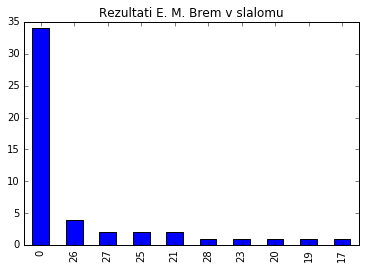

In [16]:
brem[slalom]['mesto1'].value_counts().plot(kind='bar', title="Rezultati E. M. Brem v slalomu")

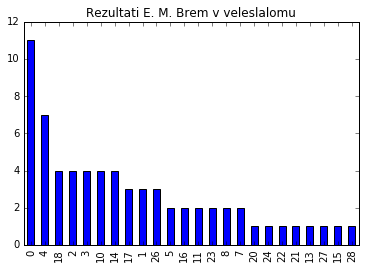

In [17]:
brem[veleslalom]['mesto1'].value_counts().plot(kind='bar', title='Rezultati E. M. Brem v veleslalomu')

Poglejmo še koliko točk je v povprečju osvojila pri posamezni disciplini, da določimo njeno "paradno disciplino".

In [18]:
brem.groupby(['disciplina'])['tocke'].sum() / brem['tocke'].sum()

disciplina
Downhill          0.00000
Giant Slalom      0.92259
Slalom            0.05258
Super Combined    0.02483
Super G           0.00000
Name: tocke, dtype: float64

Veleslalom je torej precej očitno disciplina, ki ji prinaša največ točk.

Poglejmo si še podatke za letošnjo sezono. Prva tekma je bila 24. 10. 2015 v Soeldnu.

In [19]:
prvi_del = brem[brem['datum'].dt.year == 2016]
drugi_del = brem[(brem['datum'].dt.month > 9) & (brem['datum'].dt.year == 2015)]
tabela = prvi_del.append(drugi_del)
tabela#pd.DatetimeIndex(tabela['datum'])

,datum,kraj,disciplina,mesto,zaostanek,mesto1,tocke
0,2016-03-20,St. Moritz,Giant Slalom,4,7.78,4,50
1,2016-07-03,Jasna,Giant Slalom,1,0.00,1,100
2,2016-06-03,Jasna,Slalom,26,46.21,26,5
3,2016-02-15,Crans Montana,Slalom,DNQ1,NaN,0,0
4,2016-01-30,Maribor,Giant Slalom,4,2.68,4,50
5,2016-01-17,Flachau,Giant Slalom,4,10.75,4,50
6,2016-01-15,Flachau,Slalom,26,22.85,26,5
7,2016-12-01,Flachau,Slalom,26,34.79,26,5
8,2016-05-01,Santa Caterina Valfurva,Slalom,26,36.17,26,5
9,2015-12-29,Lienz,Slalom,21,19.38,21,10


Potek sezone ponazorimo z grafom (ker nižje mesto (1 < 30) pomeni boljši rezultat, gledamo negativne vrednosti):

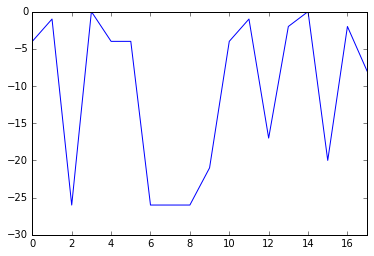

In [20]:
tabela['mesto1'].map(lambda x: x*(-1)).plot()

Podoben graf si poglejmo še za veleslalom:

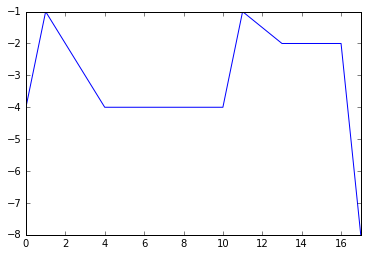

In [21]:
tabela[tabela['disciplina'] == 'Giant Slalom']['mesto1'].map(lambda x: x*(-1)).plot()

Opazimo, da zadnji rezultat zelo izstopa. To je prva uvrstitev v sezoni: "le" 8. mesto v Soeldnu 24. 10. 2015.

### Analiza več tekmovalcev

V tem razdelku bomo imeli nekaj težav, saj na strani, iz katere pobiramo podatke, ni zapisa o spolu tekmovalca. Poskusili se bomo znajti drugače.  
Najprej pa poglejmo rezultate za to sezono.

In [115]:
sezona = vse[vse['datum'].dt.year == 2016]
drugi_del_vse = vse[(vse['datum'].dt.month > 9) & (vse['datum'].dt.year == 2015)]
sezona.append(drugi_del)[40:46]
#tabela#pd.DatetimeIndex(tabela['datum'])

,datum,disciplina,id,kraj,mesto,mesto1,tocke,zaostanek
232,2016-10-01,Slalom,80000,Adelboden,22,22,9,18.24
233,2016-06-01,Slalom,80000,Santa Caterina Valfurva,DNQ1,0,0,NaN
293,2016-03-16,Downhill,120086,St. Moritz,10,10,26,14.12
294,2016-03-13,Alpine combined,120086,Lenzerheide,18,18,13,41.74
295,2016-12-03,Super G,120086,Lenzerheide,34,34,0,33.04
296,2016-02-28,Alpine combined,120086,Soldeu- El Tarter,DNF2,0,0,NaN


Zanima nas, koliko nastopov so zbrali tekmovalci v letošnji sezoni. Prikazujemo število nastopov za 10 tekmovalcev.

In [44]:
sezona.groupby(['id']).size()[:10]

id
2820      2
4588      1
5469      6
8288      8
10054    13
10394    11
11090    13
11353     6
11929    10
13418     3
dtype: int64

In [47]:
sezona.groupby(['id']).size().max()

21

Tekmovalec ali tekmovalka z največ nastopi je nastopila 21-krat. Kdo pa je to?

In [71]:
nova = sezona.groupby(['id']).size()#.sort_values()#inplace=True)
nova.nlargest(3)

id
125871    21
127048    21
70282     20
dtype: int64

To sta torej dva tekmovalca in sicer z id številkama 125871 in 127048.

In [85]:
[smucarji[smucarji['id'] == 125871], smucarji[smucarji['id'] == 127048]]

[         id        ime drzava    rojstvo smuci
 109  125871  GUT  Lara    SUI 1991-04-27  Head,
          id                 ime drzava    rojstvo smuci
 234  127048  PINTURAULT  Alexis    FRA 1991-03-20  Head]

To sta torej Lara Gut in Alexis Pinturault.

Kdo pa je osvojil največ točk? Poglejmo 10 najboljših:

In [96]:
najboljsi = sezona.groupby(['id']).agg({'tocke':sum}).nlargest(columns = 'tocke', n = 10)
najboljsi

,tocke
id,
106332,1174
127048,1079
154950,933
125871,878
104502,823
27657,755
30368,749
107164,716
109079,658


Še njihova imena:

In [112]:
print(smucarji[smucarji['id'] == 106332][['id','ime']])
print(smucarji[smucarji['id'] == 127048][['id','ime']])
print(smucarji[smucarji['id'] == 154950][['id','ime']])
print(smucarji[smucarji['id'] == 125871][['id','ime']])
print(smucarji[smucarji['id'] == 104502][['id','ime']])
print(smucarji[smucarji['id'] == 27657][['id','ime']])
print(smucarji[smucarji['id'] == 30368][['id','ime']])
print(smucarji[smucarji['id'] == 107164][['id','ime']])
print(smucarji[smucarji['id'] == 109079][['id','ime']])
print(smucarji[smucarji['id'] == 137380][['id','ime']])

         id               ime
123  106332  HIRSCHER  Marcel
         id                 ime
234  127048  PINTURAULT  Alexis
         id                    ime
155  154950  KRISTOFFERSEN  Henrik
         id        ime
109  125871  GUT  Lara
         id                   ime
246  104502  REBENSBURG  Viktoria
        id              ime
136  27657  JANSRUD  Kjetil
        id            ime
325  30368  VONN  Lindsey
         id              ime
331  107164  WEIRATHER  Tina
         id             ime
227  109079  PARIS  Dominik
         id                       ime
144  137380  KILDE  Aleksander Aamodt


### Analiza narodnosti

Zanima nas, koliko je smučarjev določene narodnosti. Najprej jih preštejmo, nato pa ponazorimo to z grafom:

In [22]:
smucarji['drzava'].value_counts().head(10)

AUT    61
SUI    45
ITA    42
FRA    39
USA    31
GER    26
SWE    20
NOR    18
CAN    18
SLO    15
Name: drzava, dtype: int64

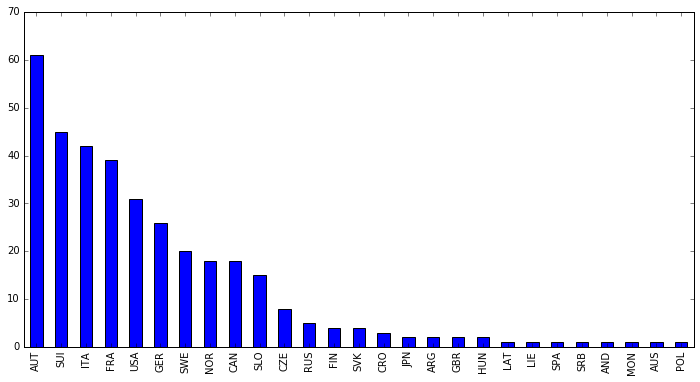

In [119]:
smucarji['drzava'].value_counts().plot(kind='bar', figsize = (12,6))

### Analiza smuči

Najprej si oglejmo, katere znamke smuči so najpogostejše v svetovnem pokalu:

In [24]:
smucarji['smuci'].value_counts()

Head          76
Rossignol     68
Fischer       48
Atomic        43
Voelkl        32
Salomon       25
Stoeckli      20
Nordica       14
Dynastar       9
Ni_podatka     9
Blizzard       6
Elan           4
Hart           1
Name: smuci, dtype: int64

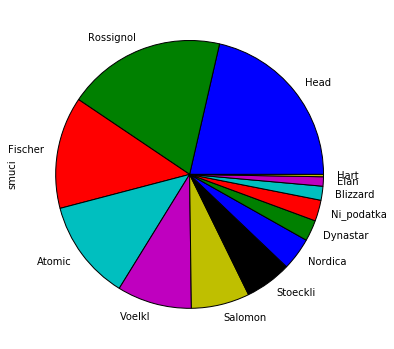

In [25]:
smucarji['smuci'].value_counts().plot(kind='pie', figsize=(6,6))

Poglejmo, predstavniki katerih držav uporabljajo smuči Head (in koliko jih je):

To do: naredi graf, ki bo prikazal to za vse smuči.

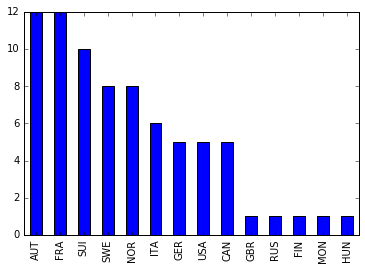

In [26]:
smucarji[smucarji['smuci'] == "Head"]['drzava'].value_counts().plot(kind='bar')

Podobno si lahko pogledamo, katerim proizvajalcem smuči najbolj zaupajo smučarji iz avstrije:

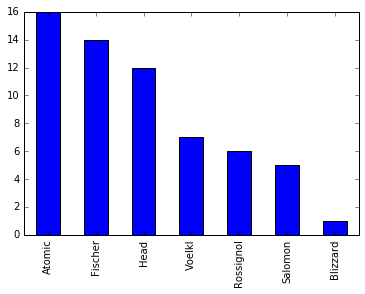

In [27]:
smucarji[smucarji['drzava'] == "AUT"]['smuci'].value_counts().plot(kind='bar')

Z analizo enega samega proizvajalca oz. ene same države ne dobimo širše slike, zato si oglejmo graf, ki za 10 držav z največ tekmovalci prikazuje, smuči katerega proizvajalca uporabljajo.

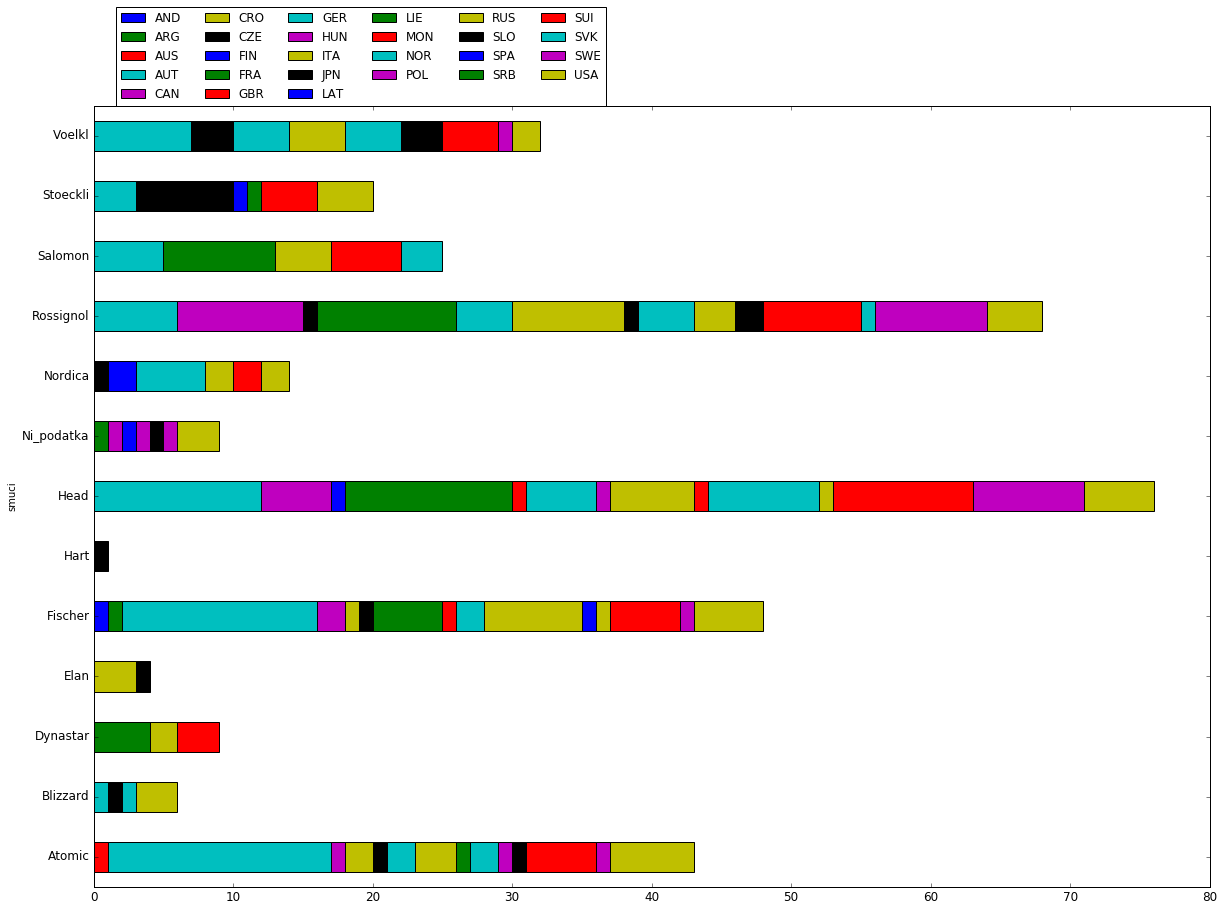

In [120]:
vsota = smucarji.groupby(['smuci']).size()
def ustr_drzava(bes):
    return (bes in ['SLO', 'AUT','GER','USA','SUI','ITA','FRA','NOR'])
#print(ustr_drzava('SLO'))
#print(smucarji[ustr_drzava(smucarji['drzava'].any())].size())
oboje = smucarji.groupby(['smuci','drzava']).size()#/vsota
priprava = oboje.unstack().plot(kind='barh', stacked=True, figsize=(20, 14), fontsize=12)
priprava.legend(loc=(0.02,1), ncol=6)